<a href="https://colab.research.google.com/github/therealfortune/tensorflow-fortune/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf

import numpy as np

rng = np.random

In [2]:
X= np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,

              7.042,10.791,5.313,7.997,5.654, 9.27,3.1])

Y=np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = X.shape[0]

In [3]:
learning_rate = 0.01

epochs = 1000

display_step = 50

In [4]:
# Weight and Bias initialized randomly.

W = tf.Variable(rng.randn(), name="weight")

b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Linear regression (Wx + b).

def linear_regression(x):

    return W * x + b

# Mean square error.

def mean_square(y_pred, y_true):

    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

In [6]:
# Stochastic Gradient Descent Optimizer

optimizer = tf.optimizers.SGD(learning_rate)

# Optimization process. 

def run_optimization():

  # Wrap computation inside a GradientTape for automatic differentiation.

    with tf.GradientTape() as g:

        pred = linear_regression(X)

        loss = mean_square(pred, Y)

    # Compute gradients.

    gradients = g.gradient(loss, [W, b])
    # Update W and b following gradients.

    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
# Run training for the given number of steps.

for step in range(1, epochs + 1):

    # Run the optimization to update W and b values.

    run_optimization()

    if step % display_step == 0:

        pred = linear_regression(X)

        loss = mean_square(pred, Y)

        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.102312, W: 0.341961, b: 0.158431
step: 100, loss: 0.099409, W: 0.336639, b: 0.196163
step: 150, loss: 0.096838, W: 0.331630, b: 0.231671
step: 200, loss: 0.094561, W: 0.326917, b: 0.265087
step: 250, loss: 0.092544, W: 0.322481, b: 0.296534
step: 300, loss: 0.090758, W: 0.318307, b: 0.326128
step: 350, loss: 0.089177, W: 0.314378, b: 0.353978
step: 400, loss: 0.087776, W: 0.310681, b: 0.380188
step: 450, loss: 0.086535, W: 0.307202, b: 0.404853
step: 500, loss: 0.085437, W: 0.303928, b: 0.428065
step: 550, loss: 0.084464, W: 0.300847, b: 0.449909
step: 600, loss: 0.083602, W: 0.297947, b: 0.470466
step: 650, loss: 0.082839, W: 0.295219, b: 0.489812
step: 700, loss: 0.082163, W: 0.292651, b: 0.508018
step: 750, loss: 0.081564, W: 0.290234, b: 0.525151
step: 800, loss: 0.081034, W: 0.287960, b: 0.541275
step: 850, loss: 0.080564, W: 0.285819, b: 0.556449
step: 900, loss: 0.080149, W: 0.283805, b: 0.570729
step: 950, loss: 0.079780, W: 0.281910, b: 0.584167
step: 1000, l

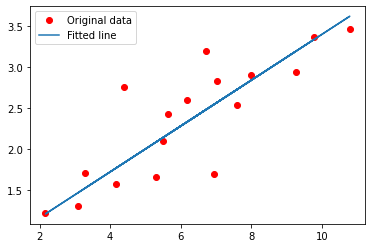

In [8]:
import matplotlib.pyplot as plt 

# Graphic display

plt.plot(X, Y, 'ro', label="Original data")
plt.plot(X, np.array(W * X +b), label="Fitted line")
plt.legend()
plt.show()